In [1]:
%matplotlib inline
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.signal import lombscargle
from itertools import cycle
import os

In [2]:
datafolder='FirstSessionWithDAF_Nov10th'
npzfile_list = sorted([os.path.join(datafolder,x) for x in os.listdir(datafolder) if x.endswith('.npz')])

In [3]:

cl = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:brown', 'tab:purple', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:grey']
colorsdict = {'rectified_actuation': cl[0], 'vehicle_speed':cl[1], 'des_speed':cl[2], 
              'kp_term':cl[3], 'kd_term':cl[4], 'ki_term': cl[5],
              'pid_actuation':cl[6], 'speed_err':cl[7], 'accpos':cl[8], 'brakepos':cl[9]}
namesdict = {'rectified_actuation': 'Rectified Actuation', 'brakepos': 'Brake', 'kp_term': 'Proportional Term',
             'kd_term': 'Derivative Term', 'ki_term': 'Integral Term',
             'pid_actuation': 'PID Actuation', 'speed_err':'Speed Error', 'des_speed': 'Desired Speed'} 

In [4]:
def tf_plotter(data, sig_groupping = [['vehicle_speed'], ['pid_actuation', 'rectified_actuation'], ['kp_term', 'kd_term', 'ki_term'], ['speed_err']], 
            time_range = (4., 10.), plot_fft = True, max_freq = 5, fig_width_per_col=10, fig_height_per_row=3):
    # Colors
    cl_cycle = cycle(cl)
    for key in data.keys():
        if key not in colorsdict:
            colorsdict[key] = next(cl_cycle)

    # Time
    t = data['time']
    datetimeobj = datetime.fromtimestamp(t.min())
    date_str = datetimeobj.strftime("%A    %B %d, %Y     %H:%M")
    t = t - t.min()

    st_idx = np.argmax(t>=time_range[0])
    end_idx = np.argmax(t>=min(time_range[1], t.max()))

    t=t[st_idx: end_idx]
    t = t - t.min()

    dtmin = np.diff(t).min()
    duration = t.ptp()

    max_freq = max_freq or t.size/duration
    min_freq = 1/duration
    freqs = np.linspace(min_freq, max_freq, 200.)

    n_rows = len(sig_groupping)
    n_cols = 2 if plot_fft else 1

    fig_width = fig_width_per_col
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * fig_width_per_col, n_rows * fig_height_per_row), sharex=False)#'col')
    #fig.set_dpi(600)
    if n_rows == 1:
        axes = [axes]
    if n_cols == 1:
        axes = [[ax_] for ax_ in axes]

    fig.suptitle(f'{date_str}\n Kp = %.3g,     Kd= %.3g,      Ki=%.3g\n' %(data['kp'][0], data['kd'][0], data['ki'][0]), fontsize=12)
    axes[0][0].set_title('Time domain')
    if plot_fft:
        axes[0][1].set_title('Frequency domain')
    i_axis = -1

    for siglist in sig_groupping:
        i_axis += 1
        is_last = (i_axis == n_rows-1)
        for signame in siglist:
            ax = axes[i_axis][0]
            ax.plot(t, data[signame][st_idx: end_idx], 'k-', linewidth=1.5, color = colorsdict[signame], label=siglabel(signame))
            if not plot_fft:
                ax.legend(loc='upper right')
            if is_last:
                ax.set_xlabel('Time (s)')
            ax.grid()
            if plot_fft:
                ax = axes[i_axis][1]
                periodogram = lombscargle(t, data[signame][st_idx: end_idx], freqs)
                kmax = periodogram.argmax()
                sig_ft = np.sqrt(4*periodogram/(5*t.size))
                ax.plot(freqs, sig_ft, 'k-', linewidth=1.5, color = colorsdict[signame], label=siglabel(signame))
                #ax.axvline(freqs[kmax], color='r', alpha=0.25)
                ax.legend(loc='upper right')
                ax.grid()
                if is_last:
                    ax.set_xlabel('Frequency (Hz)')
                    
    return fig,axes

def scatter_plotter(data, xname='pid_actuation', yname = 'rectified_actuation'):
    x=data[xname]
    y=data[yname]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x,y, s=3.)
    ax.set_xlabel(siglabel(xname))
    ax.set_ylabel(siglabel(yname))
    ax.set_title(f'{siglabel(yname)} vs {siglabel(xname)}')
    return ax, fig

def siglabel(signame):
    siglabel_ = ' '.join([x_ if i_ else x_.capitalize() for i_,x_ in enumerate(signame.split('_'))])
    siglabel_ = namesdict.get(signame, siglabel_)
    return siglabel_

In [5]:
sig_groupping = [['vehicle_speed'], ['pid_actuation', 'rectified_actuation'], ['kp_term', 'kd_term', 'ki_term'], ['speed_err'], ['des_speed']]

# First Trial

(<matplotlib.axes._subplots.AxesSubplot at 0x2b56c299e6a0>,
 <Figure size 720x720 with 1 Axes>)

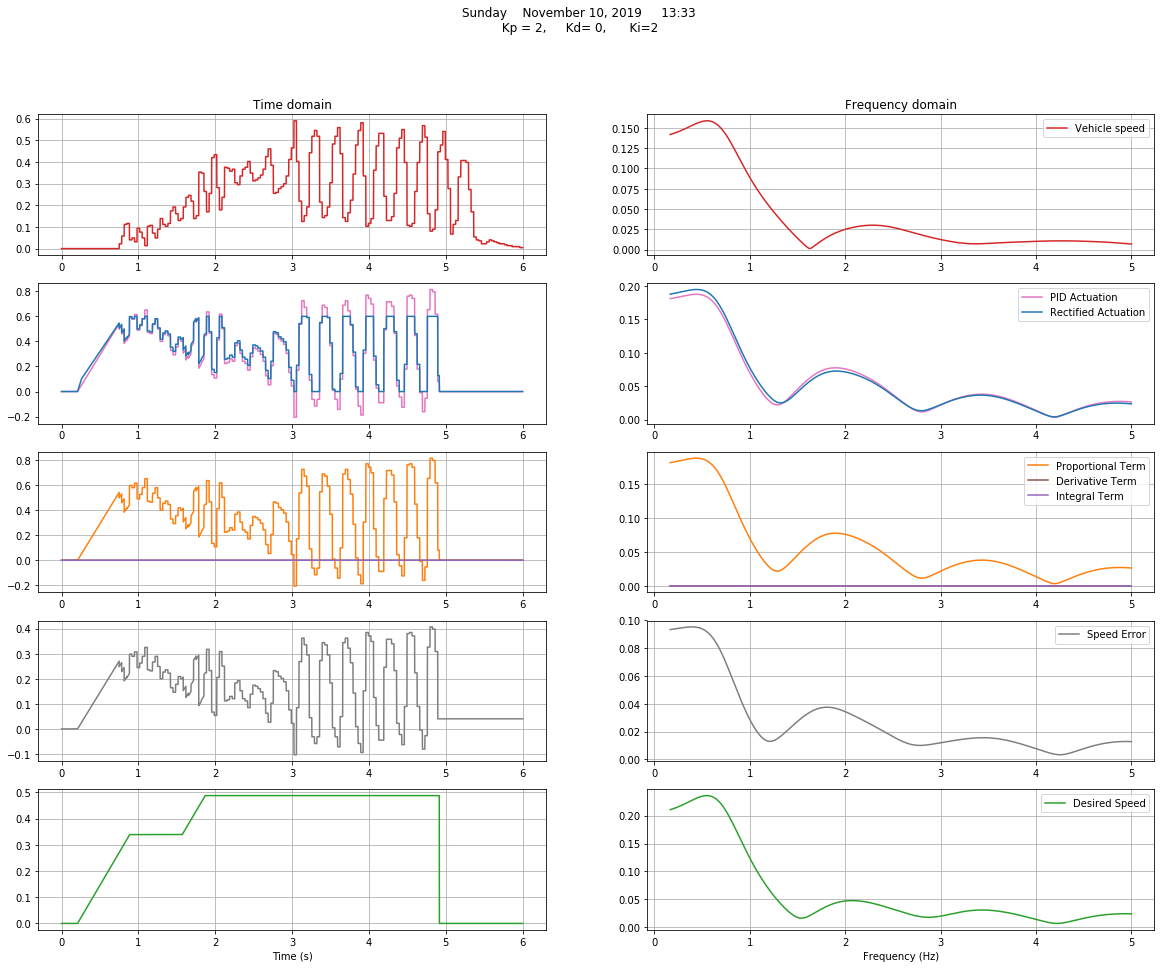

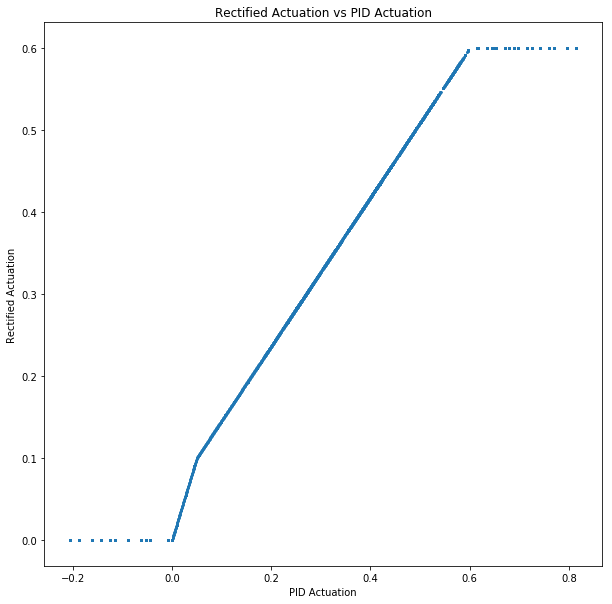

In [6]:
npz_index = 5
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (4., 10.))
scatter_plotter(data, xname='pid_actuation', yname = 'rectified_actuation')

# Second Trial

(<matplotlib.axes._subplots.AxesSubplot at 0x2b56c3e0c278>,
 <Figure size 720x720 with 1 Axes>)

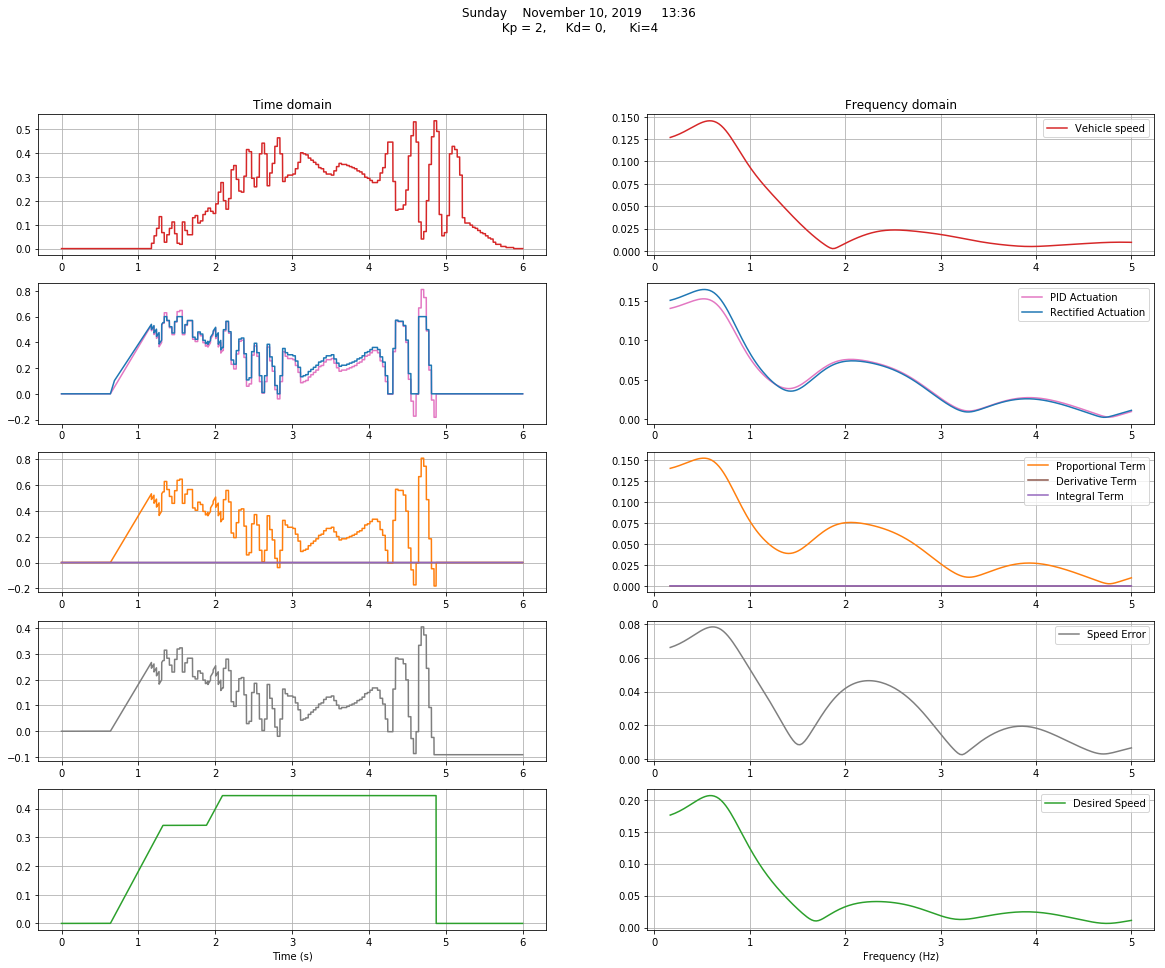

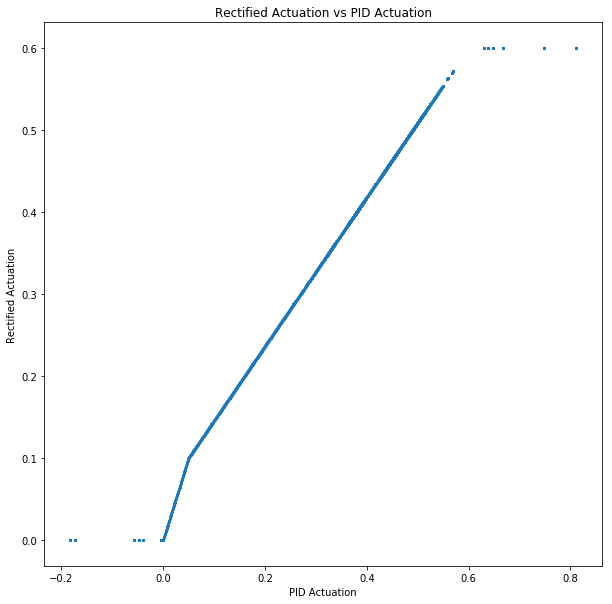

In [7]:
npz_index = 6
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (2., 8.))
scatter_plotter(data, xname='pid_actuation', yname = 'rectified_actuation')

# Third Trial

(<matplotlib.axes._subplots.AxesSubplot at 0x2b56c8a43470>,
 <Figure size 720x720 with 1 Axes>)

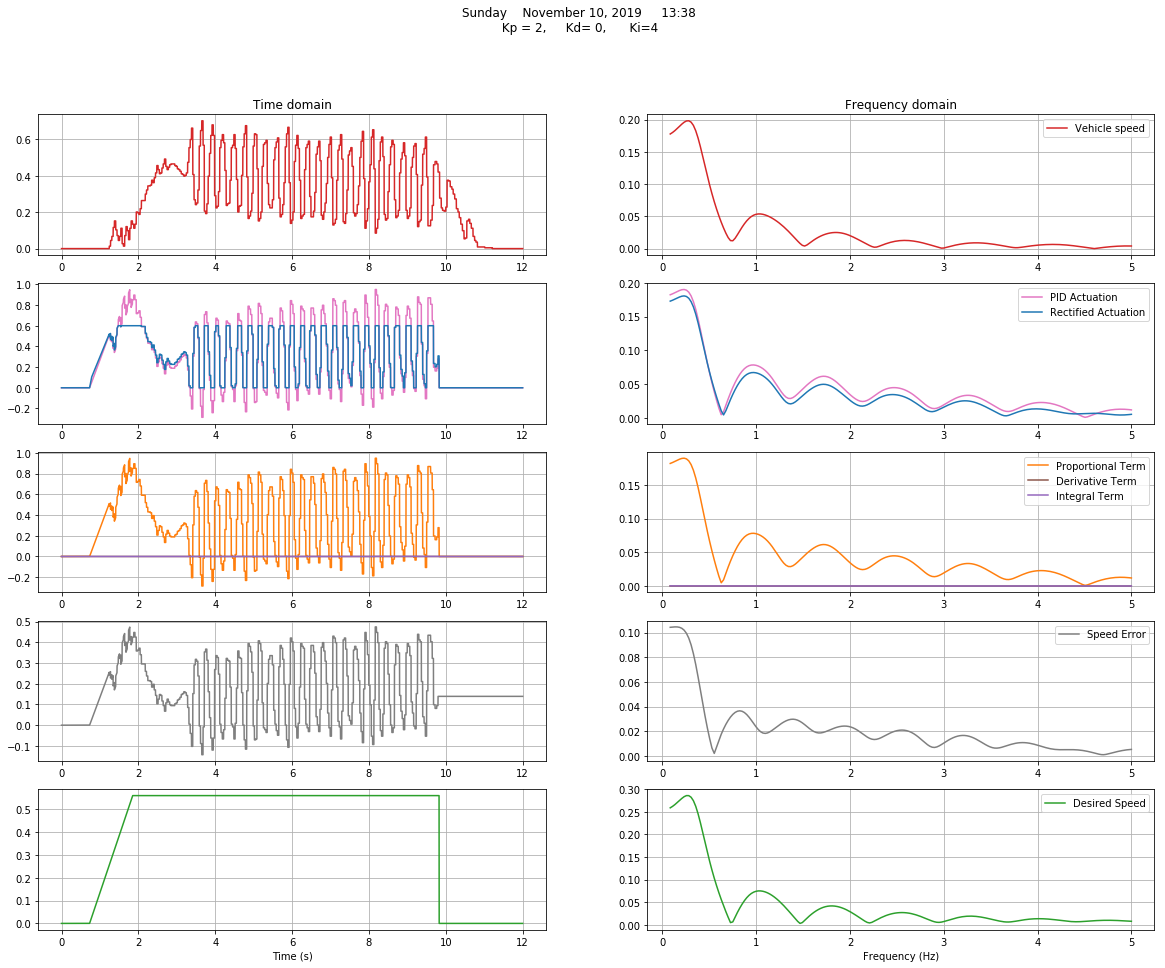

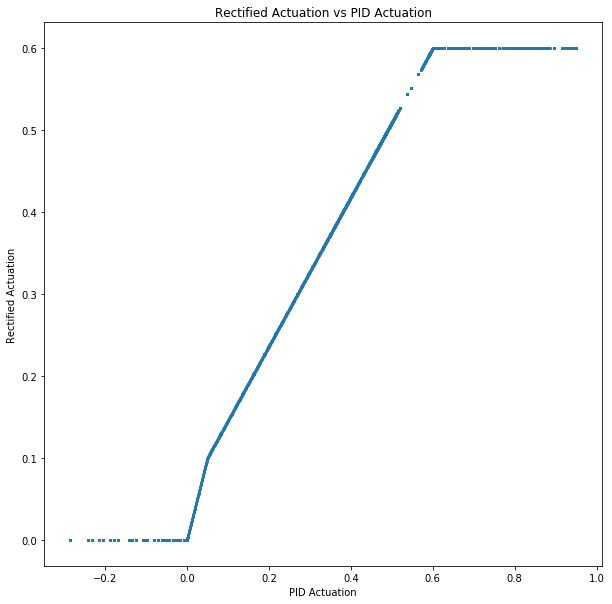

In [8]:
npz_index = 7
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (3., 15.))
scatter_plotter(data, xname='pid_actuation', yname = 'rectified_actuation')

# Fourth Trial

(<matplotlib.axes._subplots.AxesSubplot at 0x2b56c3fae0f0>,
 <Figure size 720x720 with 1 Axes>)

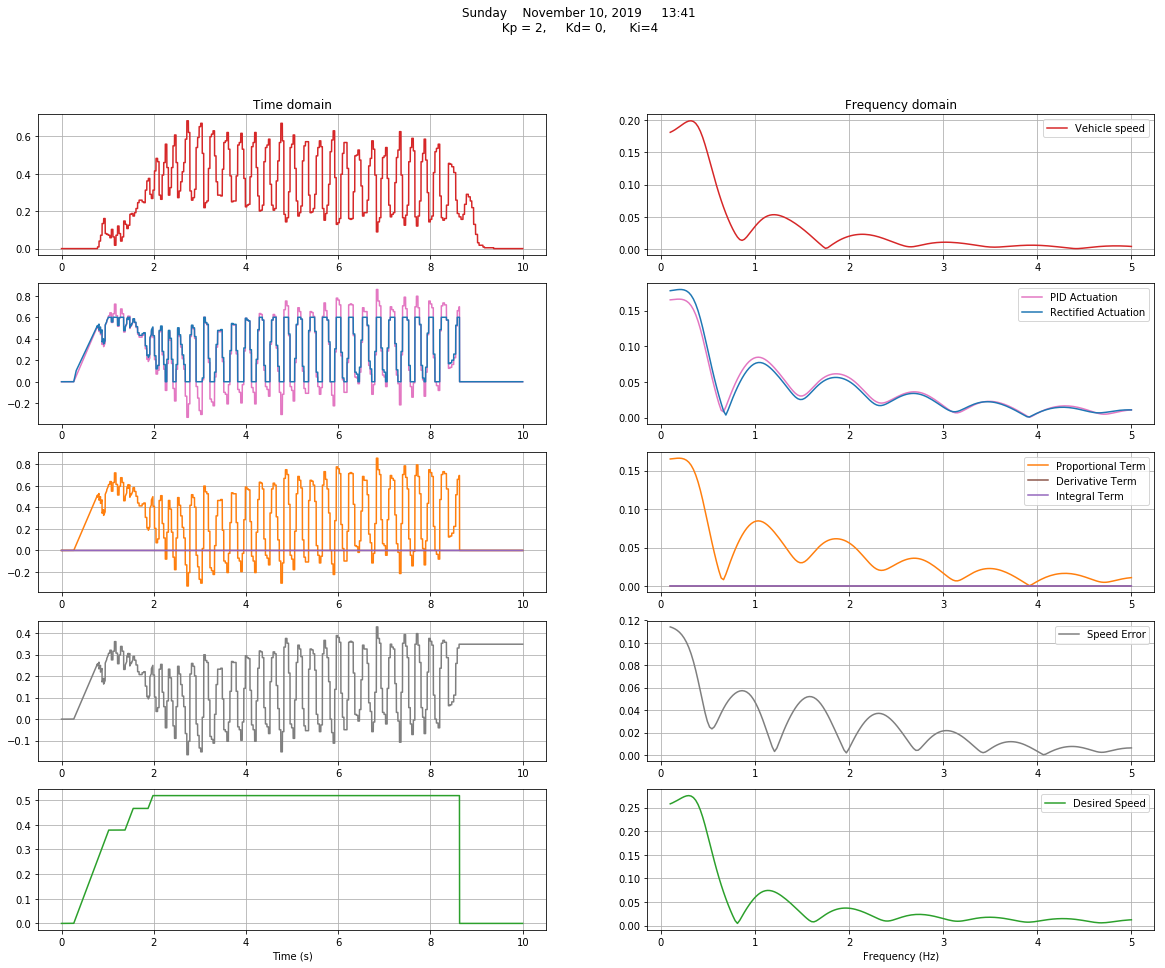

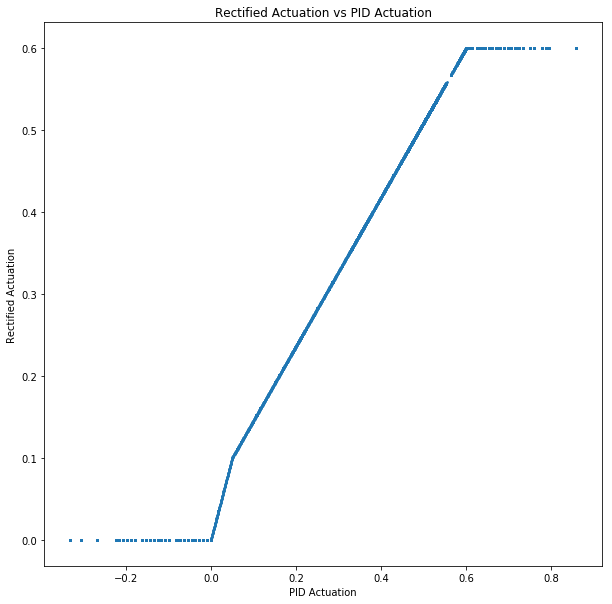

In [9]:
npz_index = 8
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (4., 14.))
scatter_plotter(data, xname='pid_actuation', yname = 'rectified_actuation')

# Fifth Trial

(<matplotlib.axes._subplots.AxesSubplot at 0x2b56c3c40080>,
 <Figure size 720x720 with 1 Axes>)

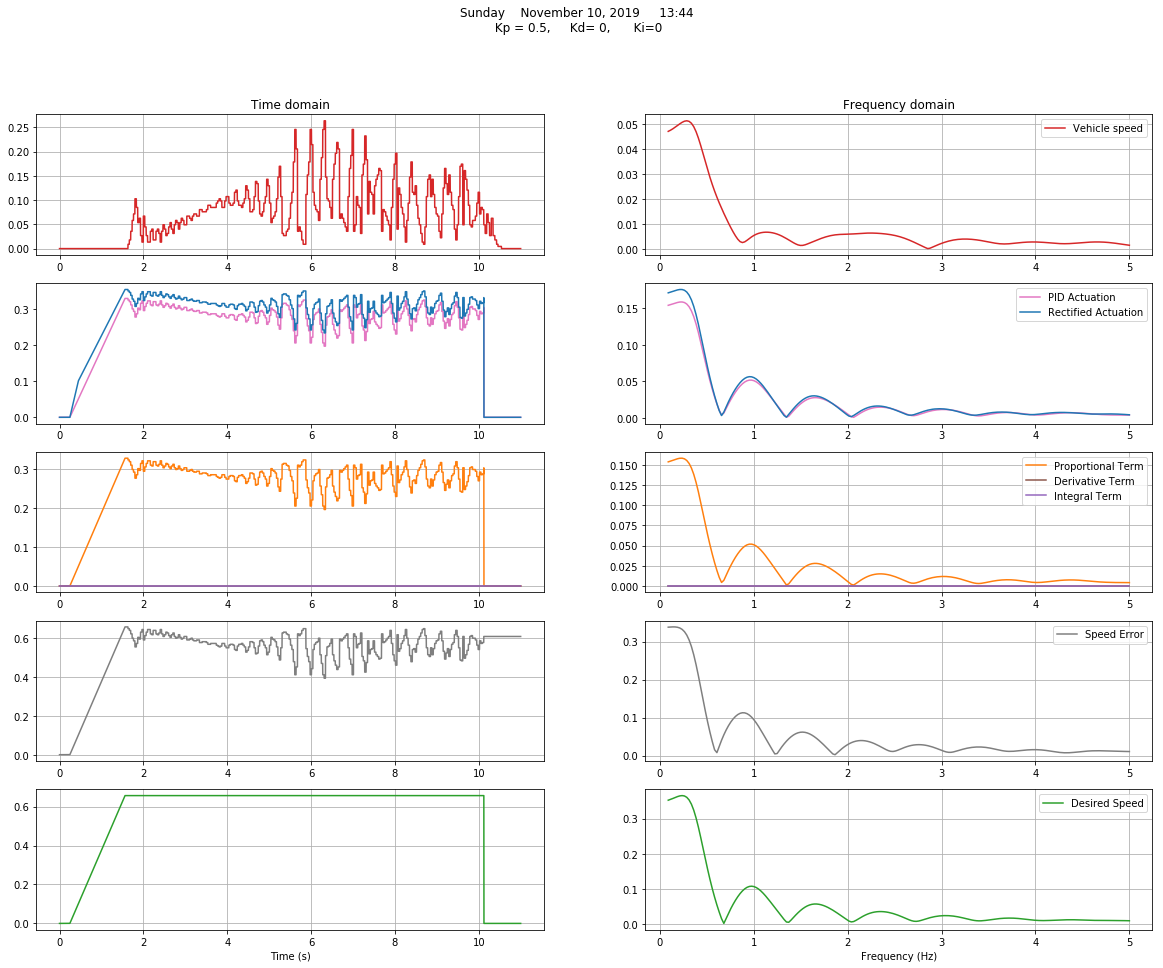

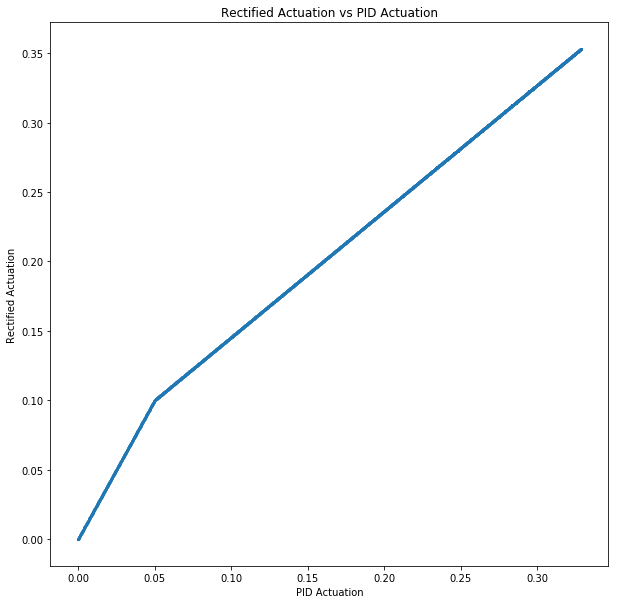

In [10]:
npz_index = 9
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (2., 13.))
scatter_plotter(data, xname='pid_actuation', yname = 'rectified_actuation')

# Sixth Trial

(<matplotlib.axes._subplots.AxesSubplot at 0x2b56c8ef8198>,
 <Figure size 720x720 with 1 Axes>)

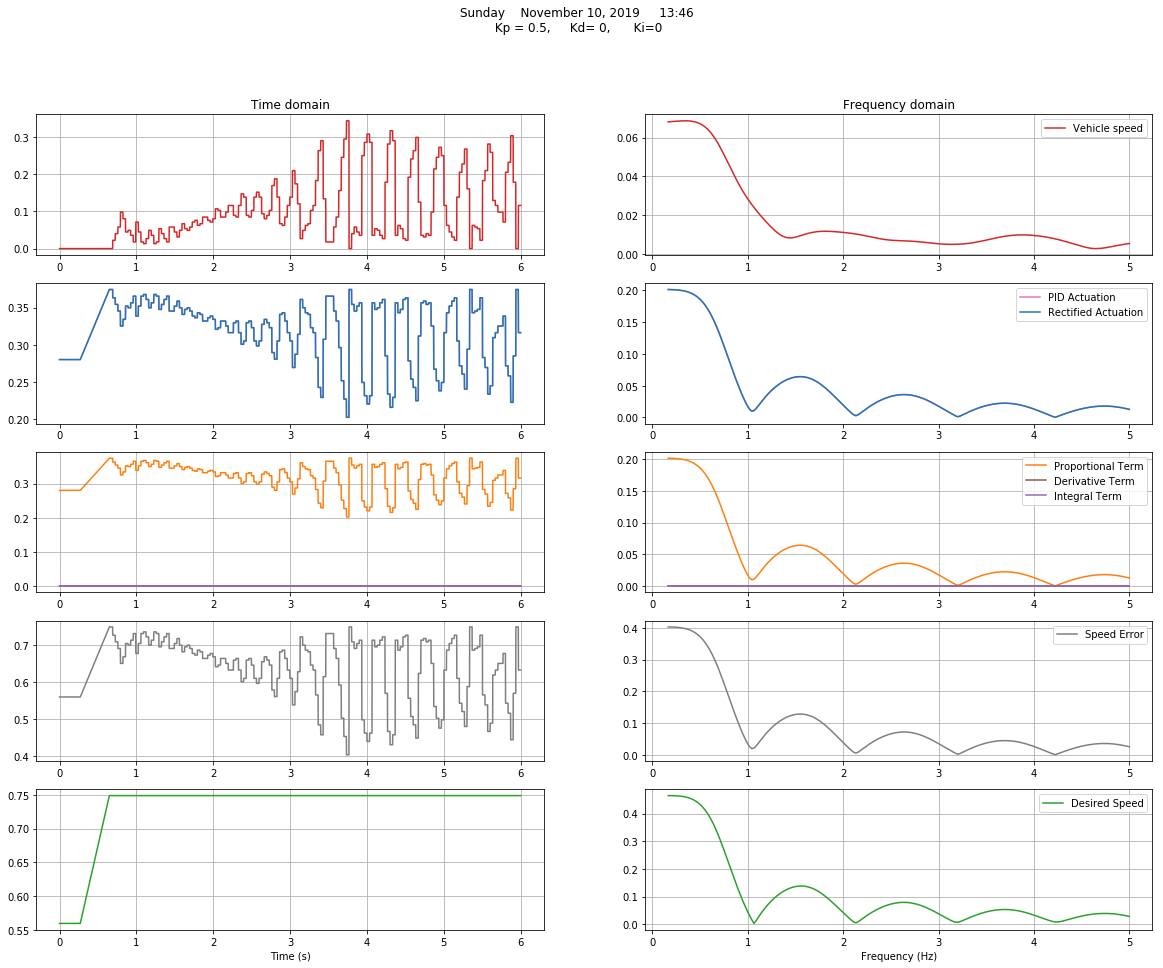

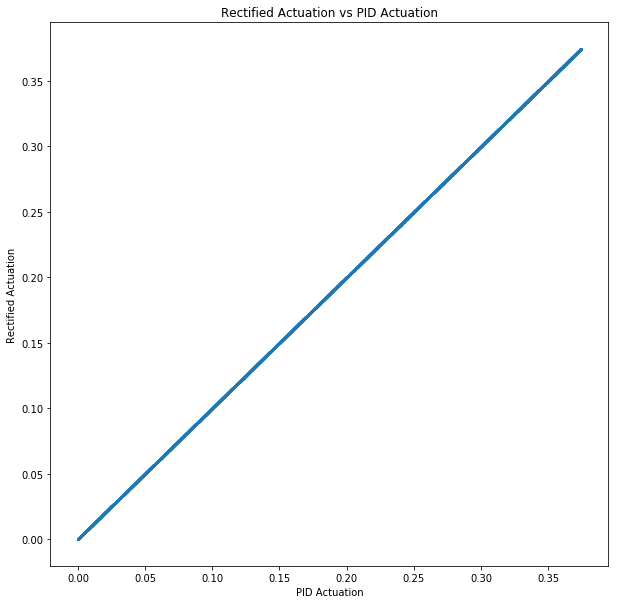

In [11]:
npz_index = 10
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (7., 13.))
scatter_plotter(data, xname='pid_actuation', yname = 'rectified_actuation')

# Seventh Trial

(<matplotlib.axes._subplots.AxesSubplot at 0x2b56c3f8e940>,
 <Figure size 720x720 with 1 Axes>)

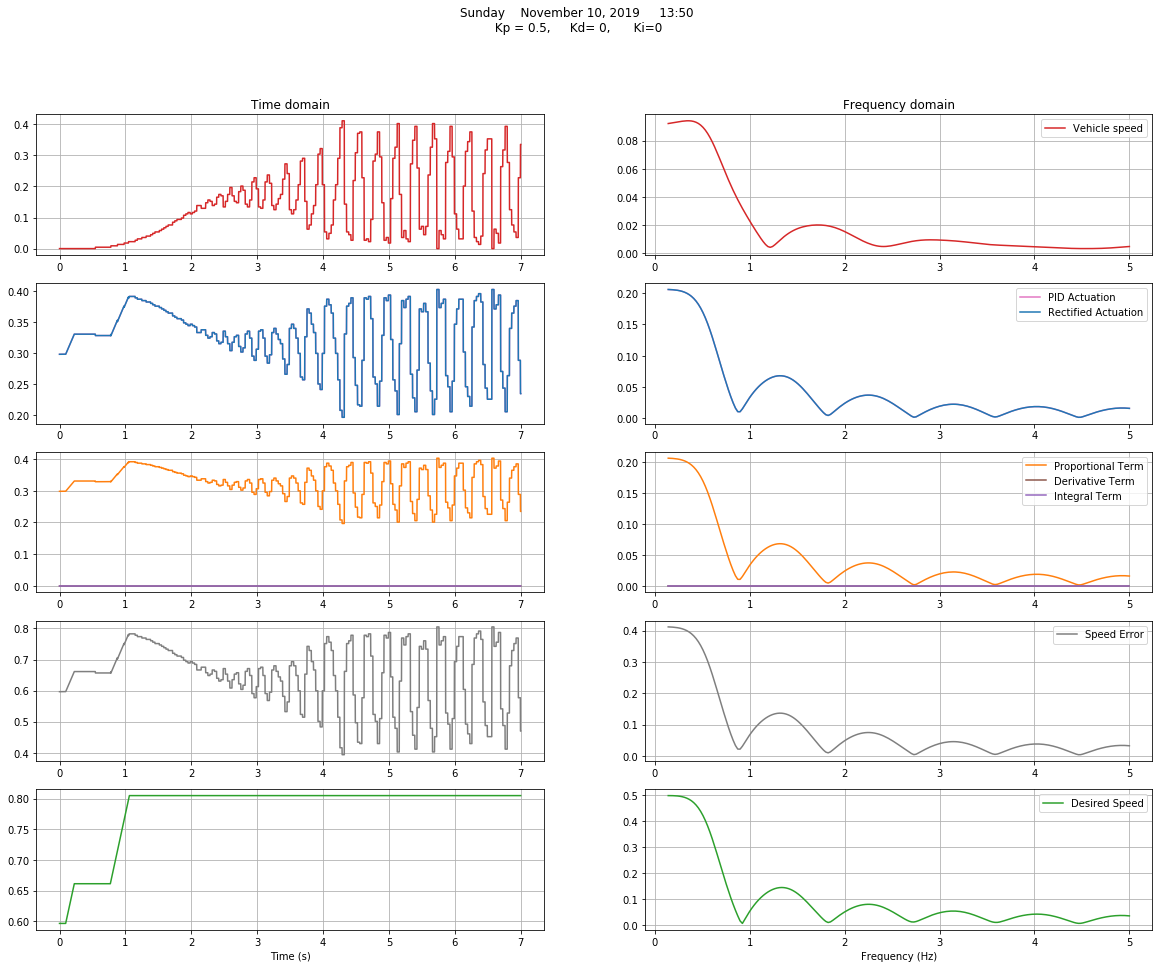

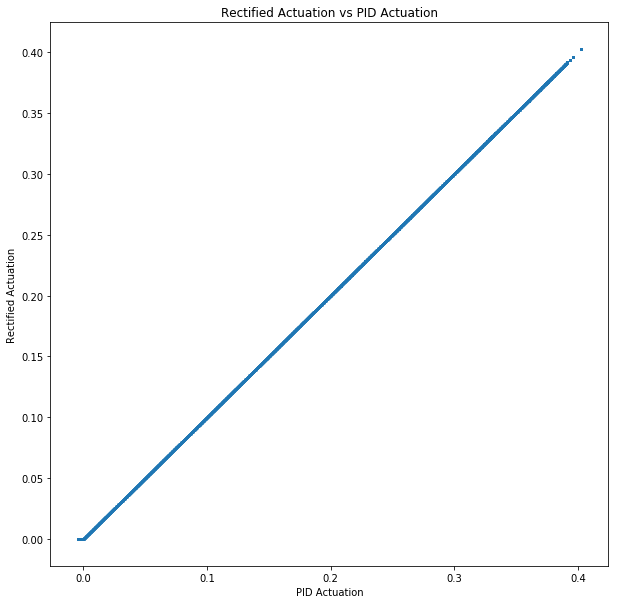

In [12]:
npz_index = 11
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (9., 16.))
scatter_plotter(data, xname='pid_actuation', yname = 'rectified_actuation')

# Eighth Trial

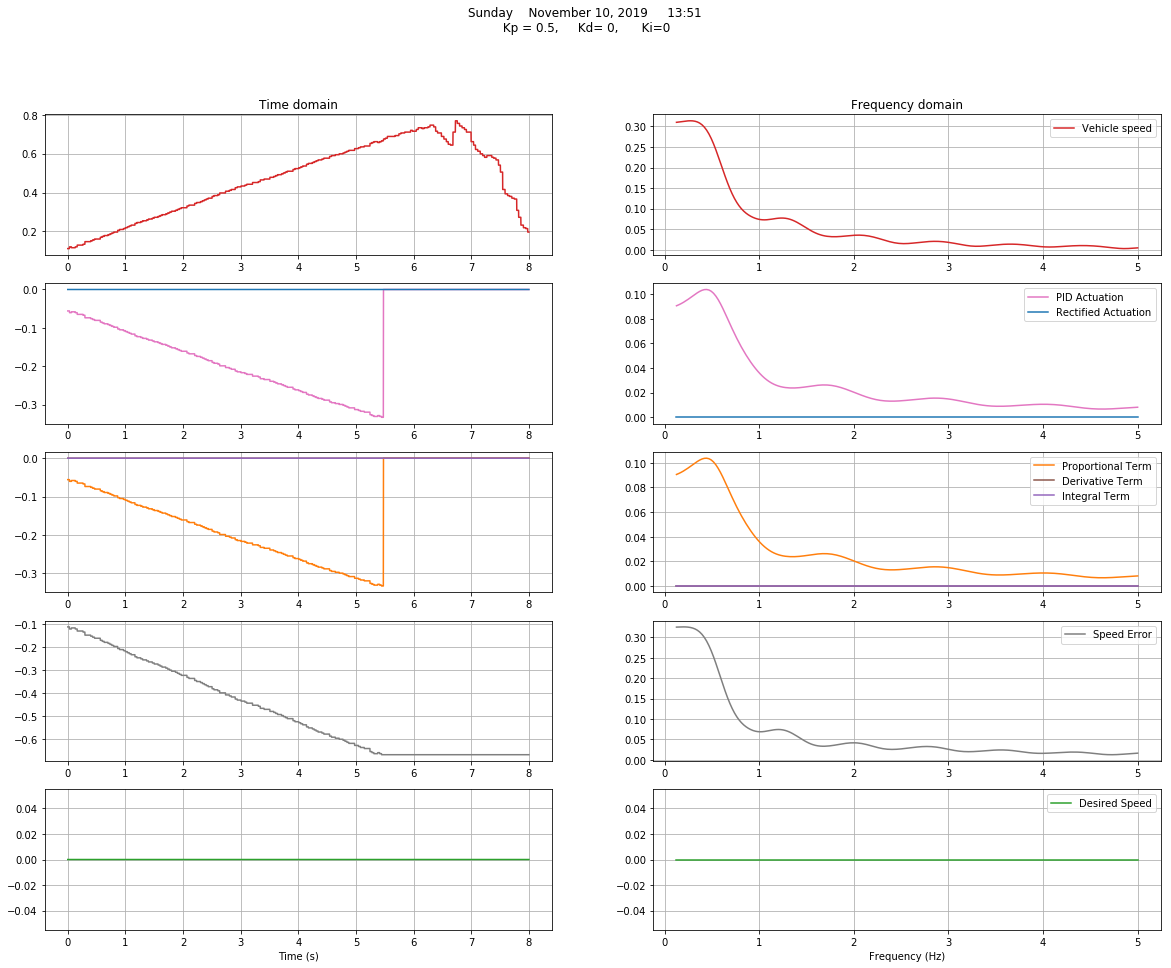

In [13]:
npz_index = 12
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (2., 10.))

# Nineth Trial

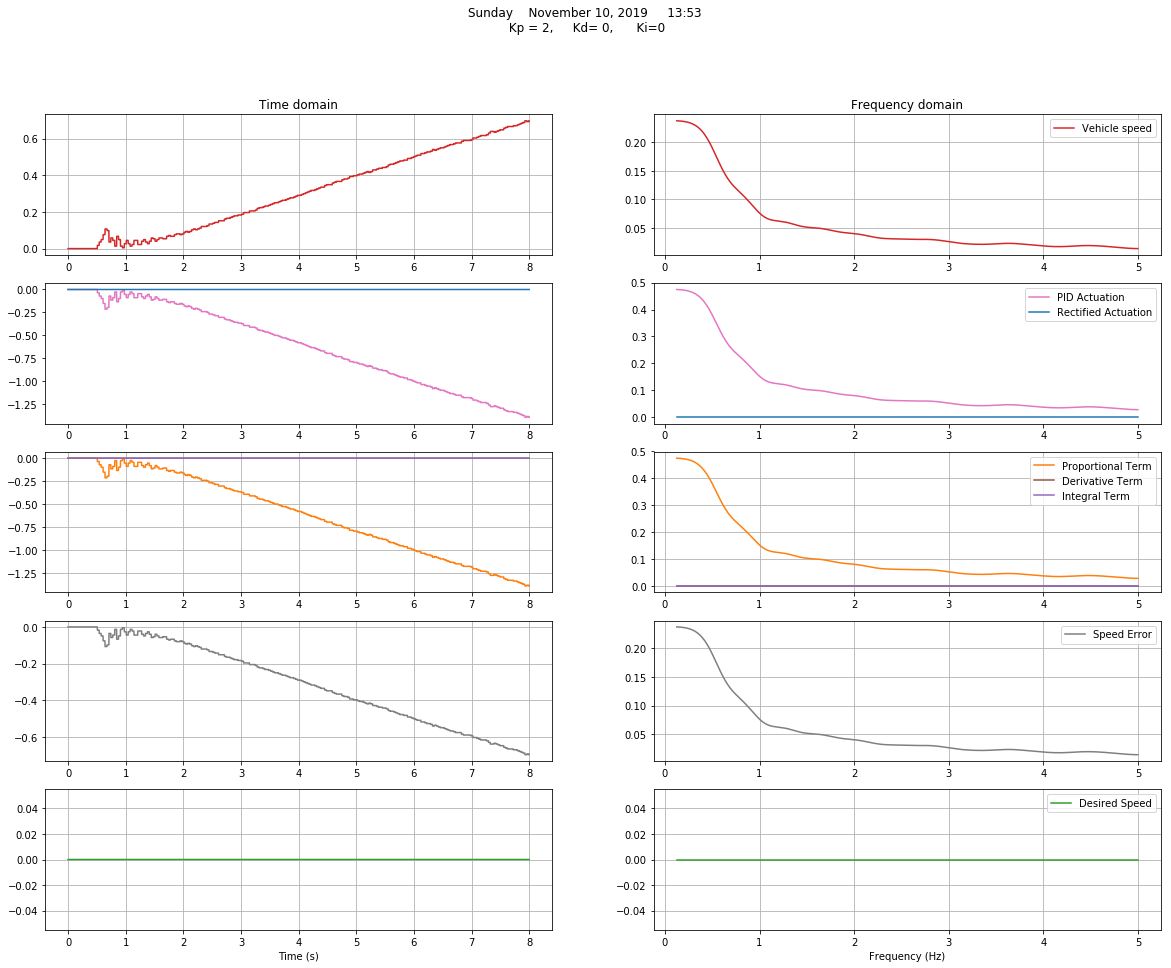

In [14]:
npz_index = 13
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (0., 8.))

# Tenth Trial

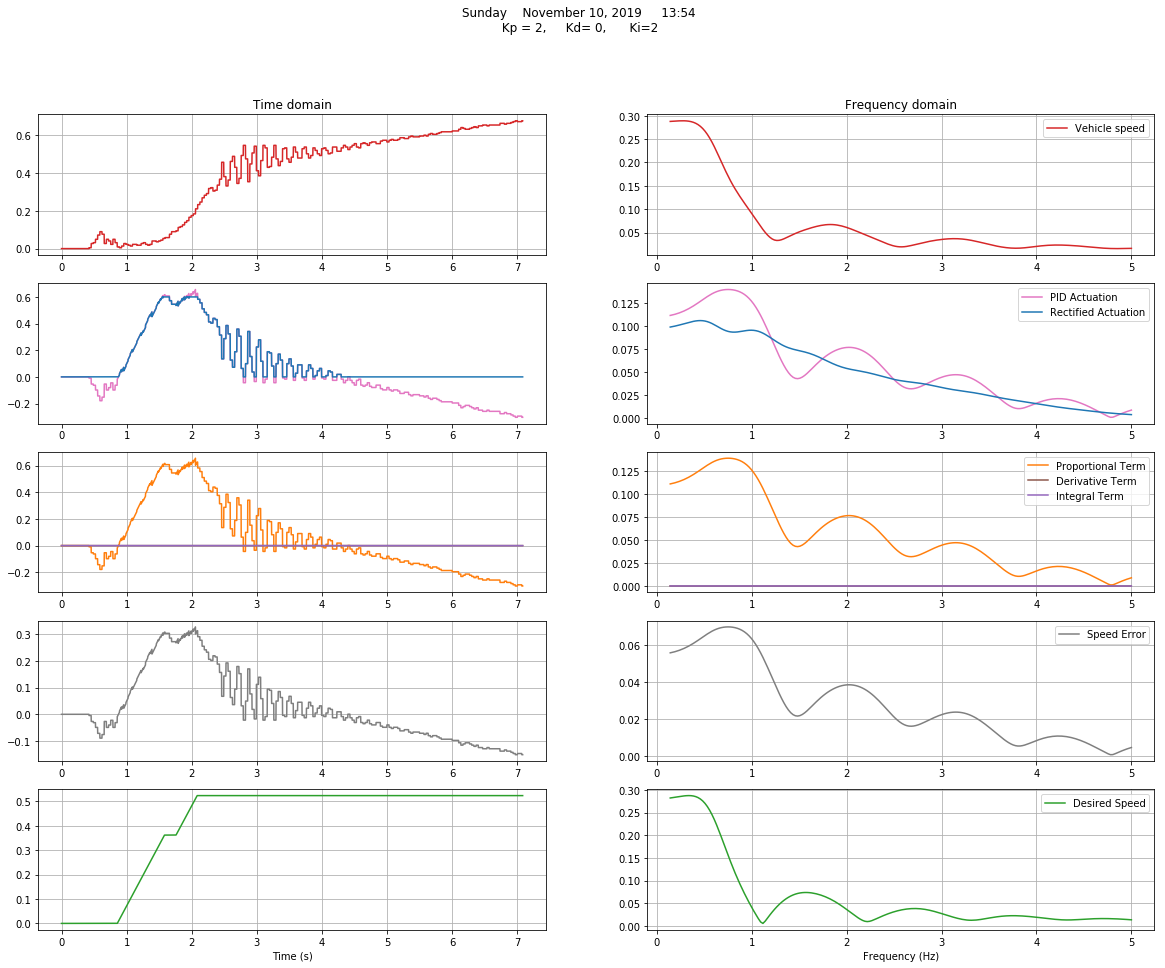

In [15]:
npz_index = 14
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (0., 10.))

# Eleventh Trial

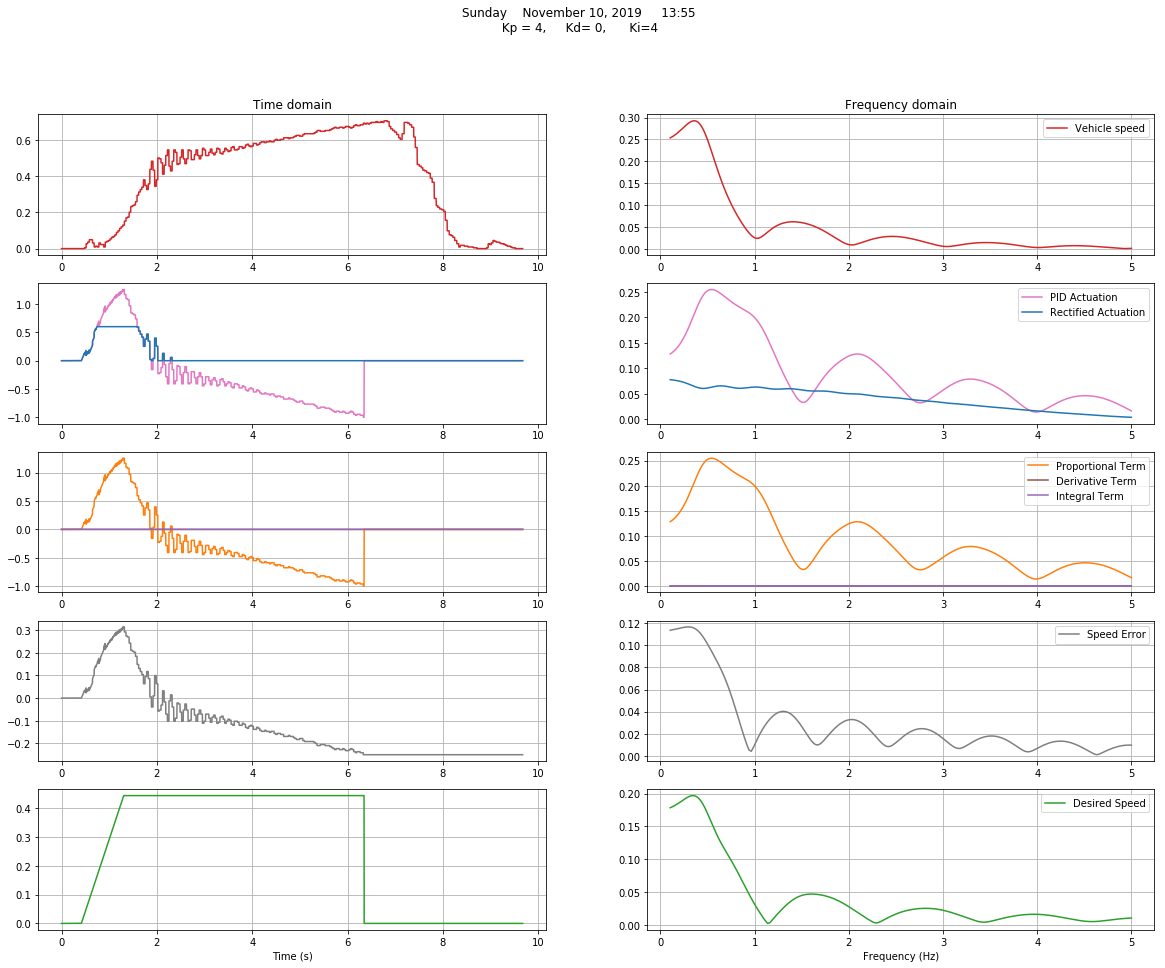

In [16]:
npz_index = 15
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (0., 10.))

# Twelveth Trial

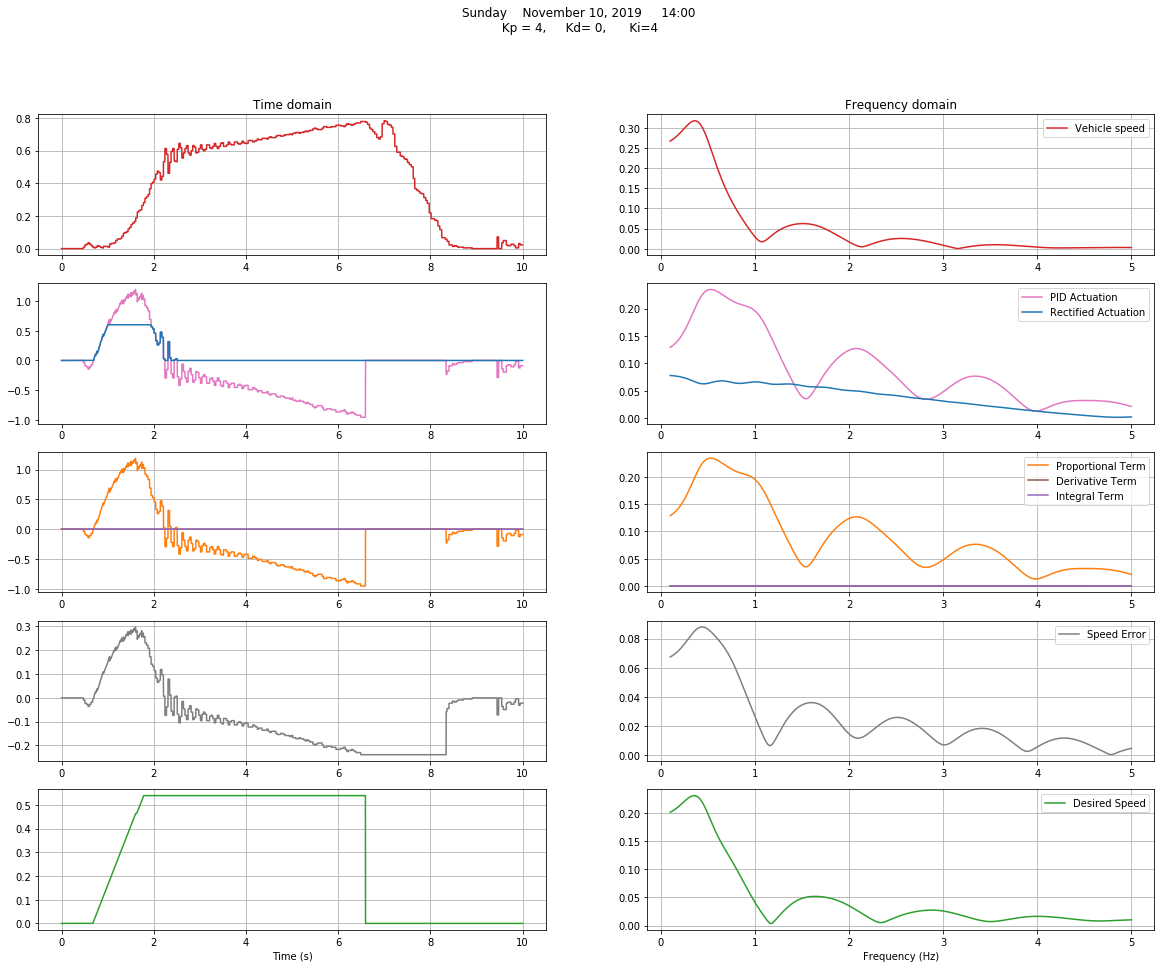

In [17]:
npz_index = 17
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (0., 10.))

# 13th Trial

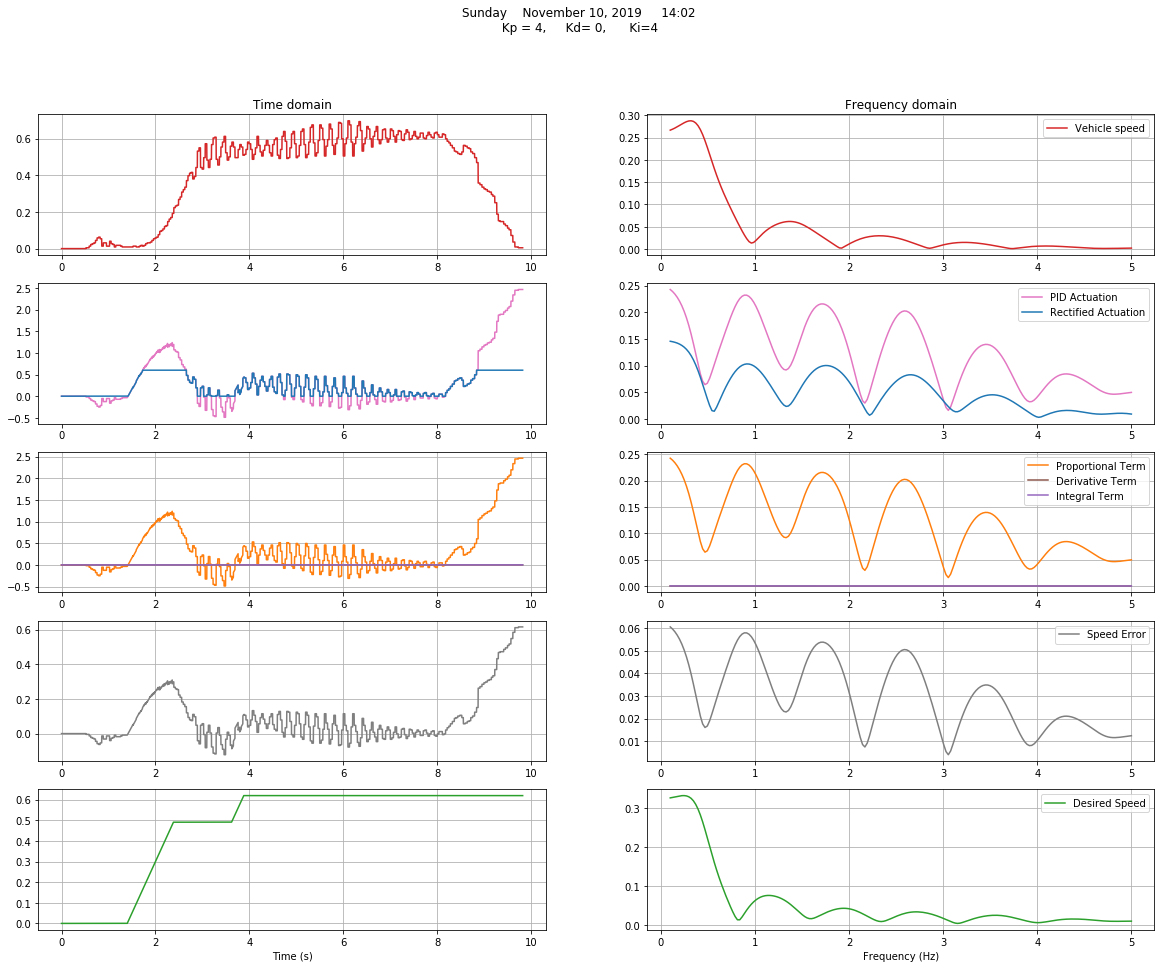

In [18]:
npz_index = 18
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (0., 10.))

# 14th Trial

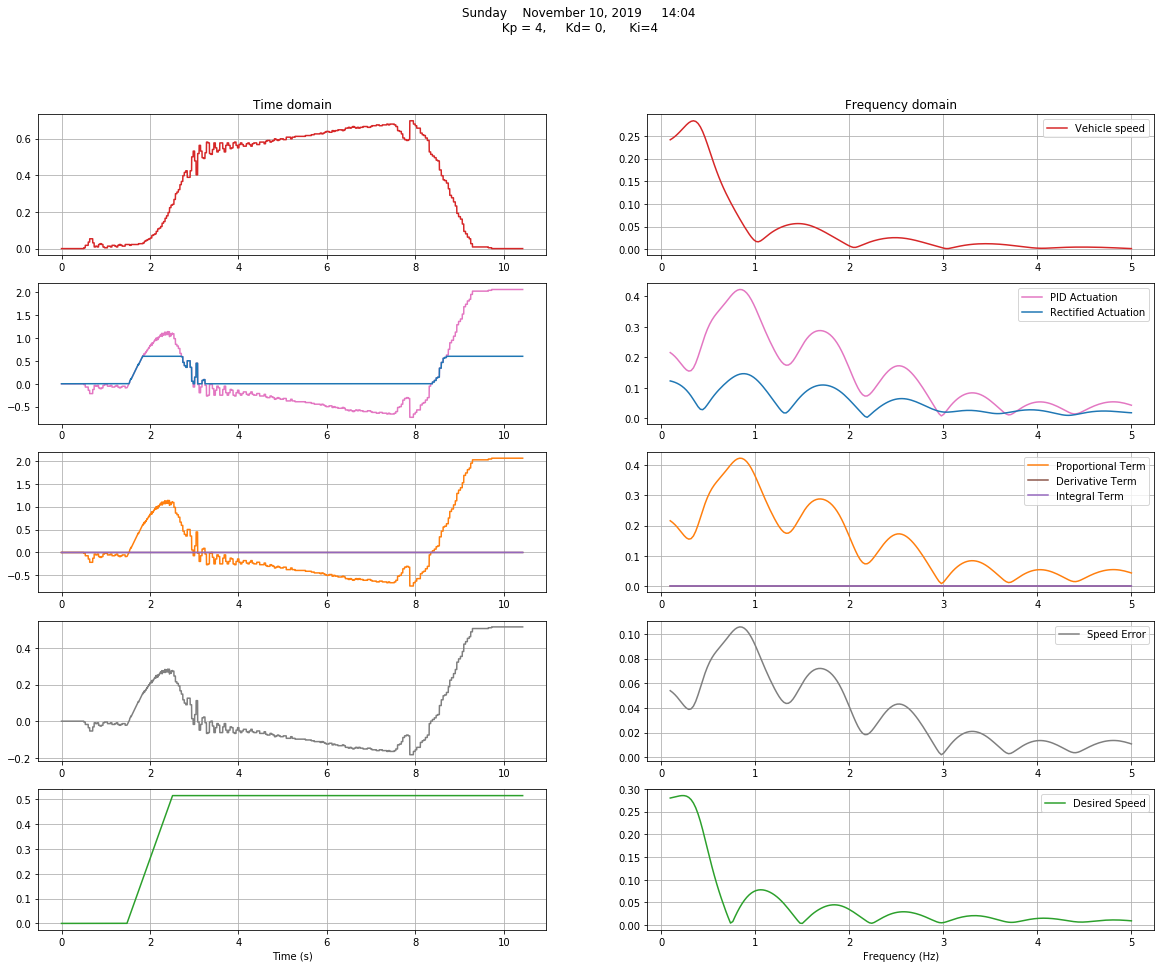

In [19]:
npz_index = 19
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (0., 12.))

# 15th Trial

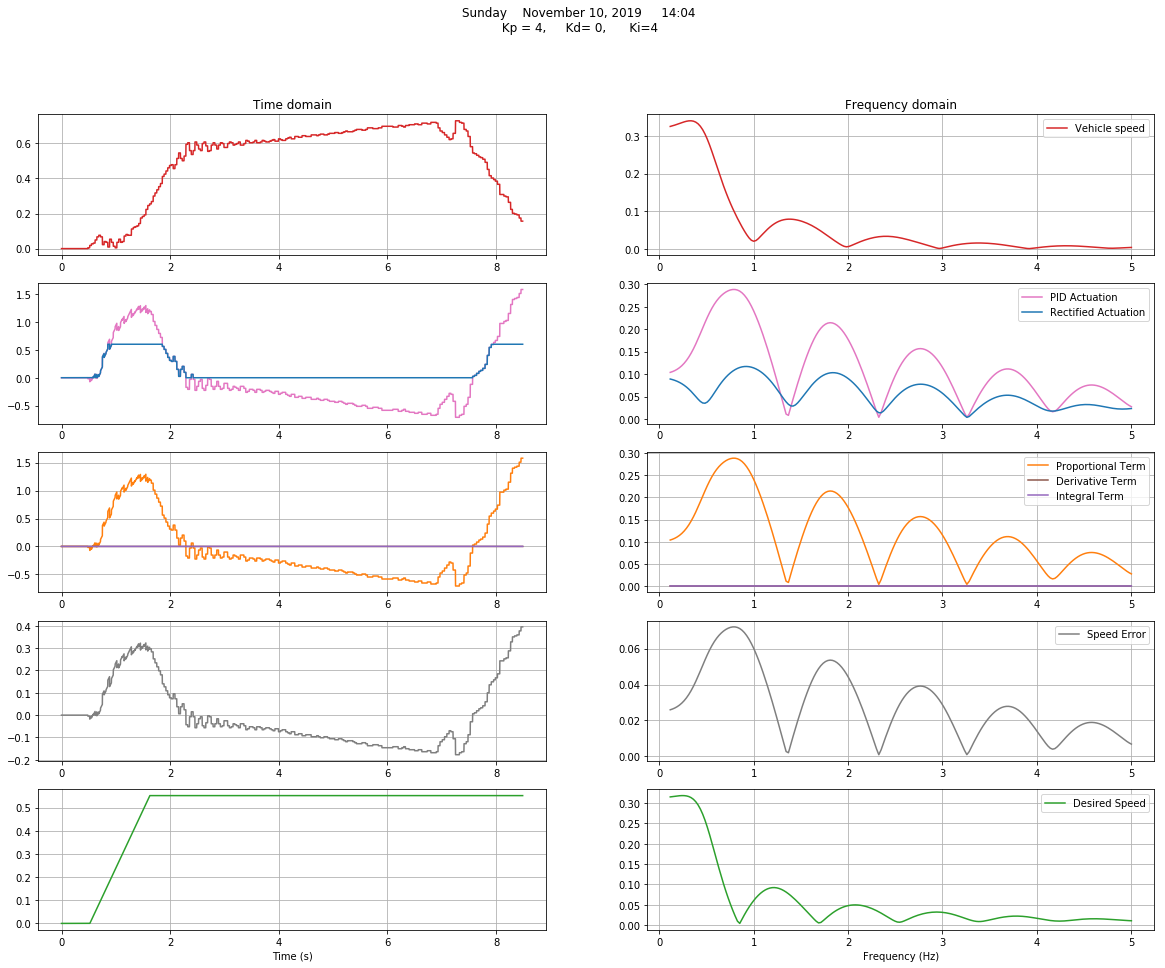

In [20]:
npz_index = 20
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (0., 10.))

# 16th Trial

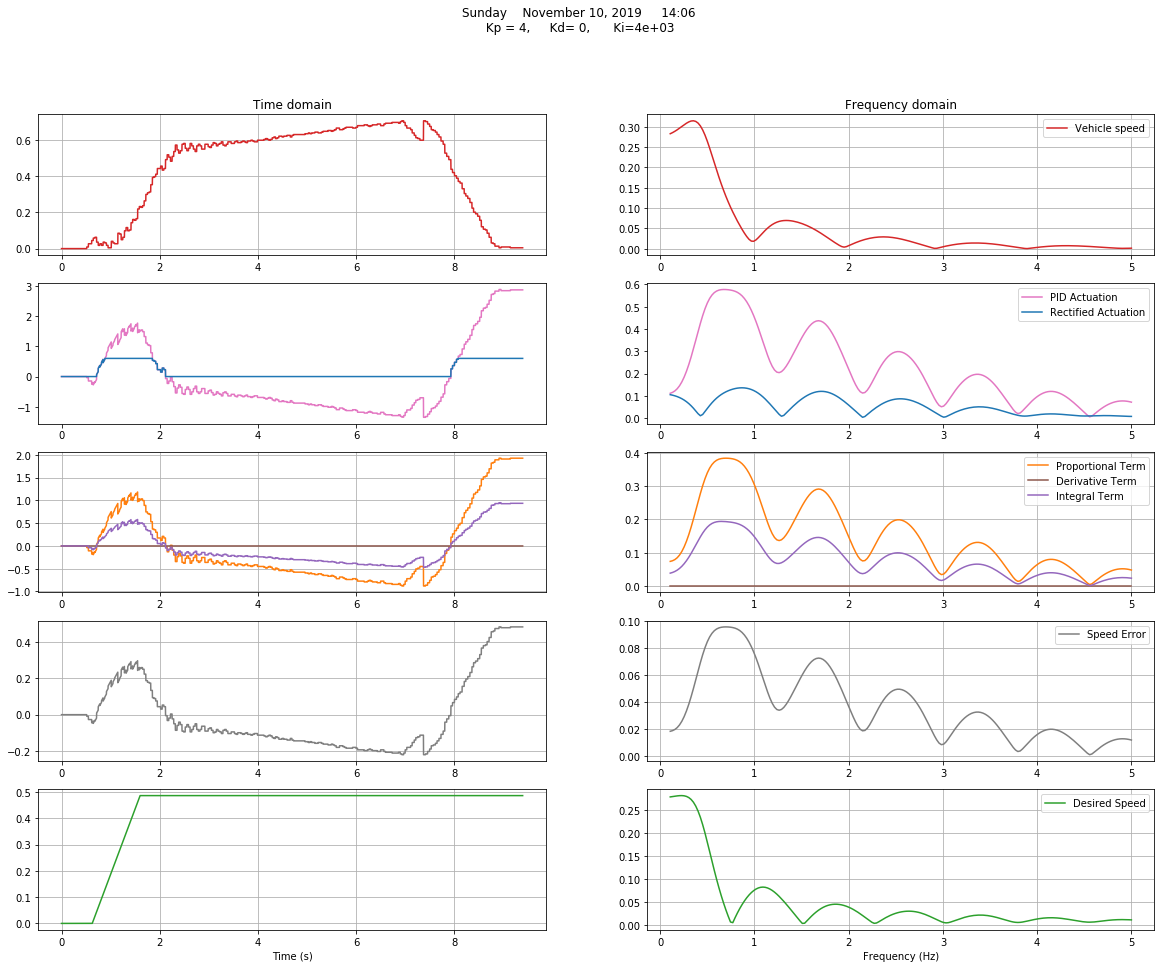

In [21]:
npz_index = 21
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping, time_range = (0., 10.))

# 17th Trial

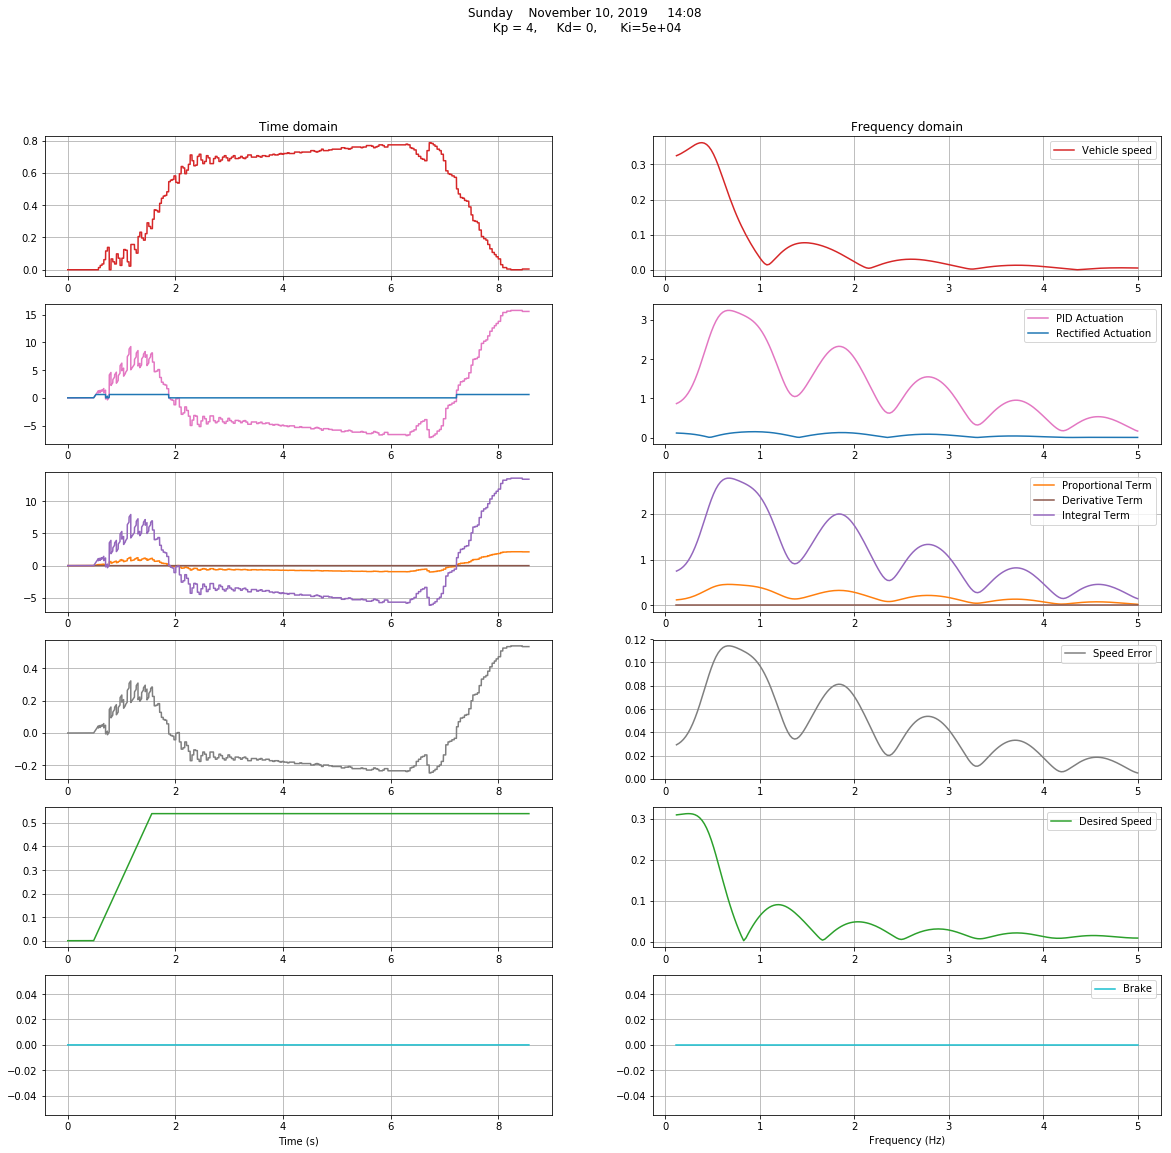

In [22]:
npz_index = 22
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping+[['brakepos']], time_range = (0., 10.))

# 18th Trial

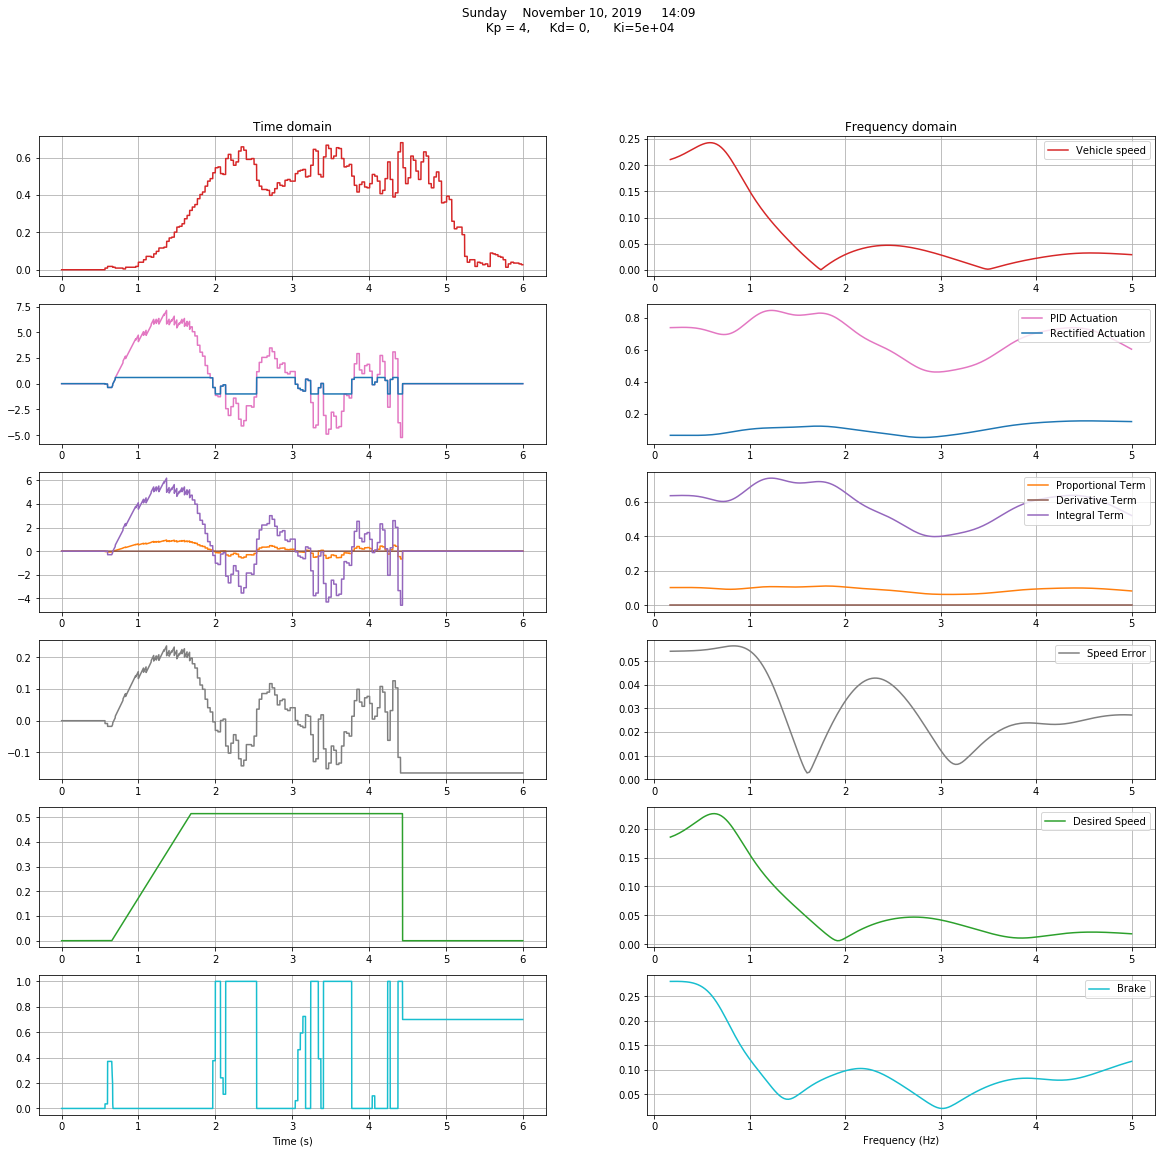

In [23]:
npz_index = 23
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping+[['brakepos']], time_range = (0., 6.))

# 19th Trial

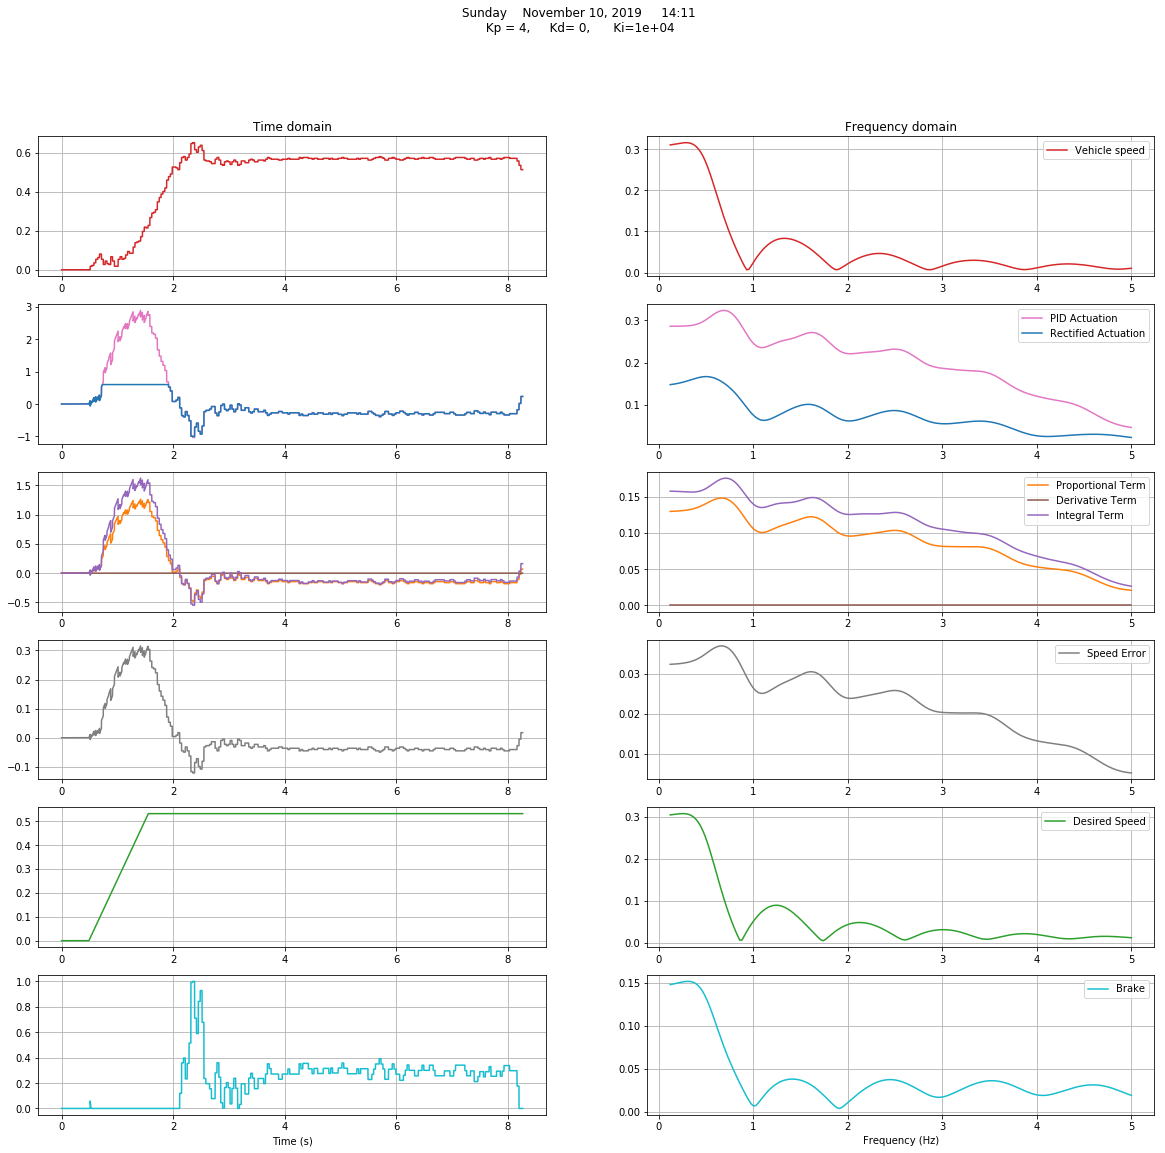

In [24]:
npz_index = 24
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping+[['brakepos']], time_range = (0., 10.))

# 20th Trial

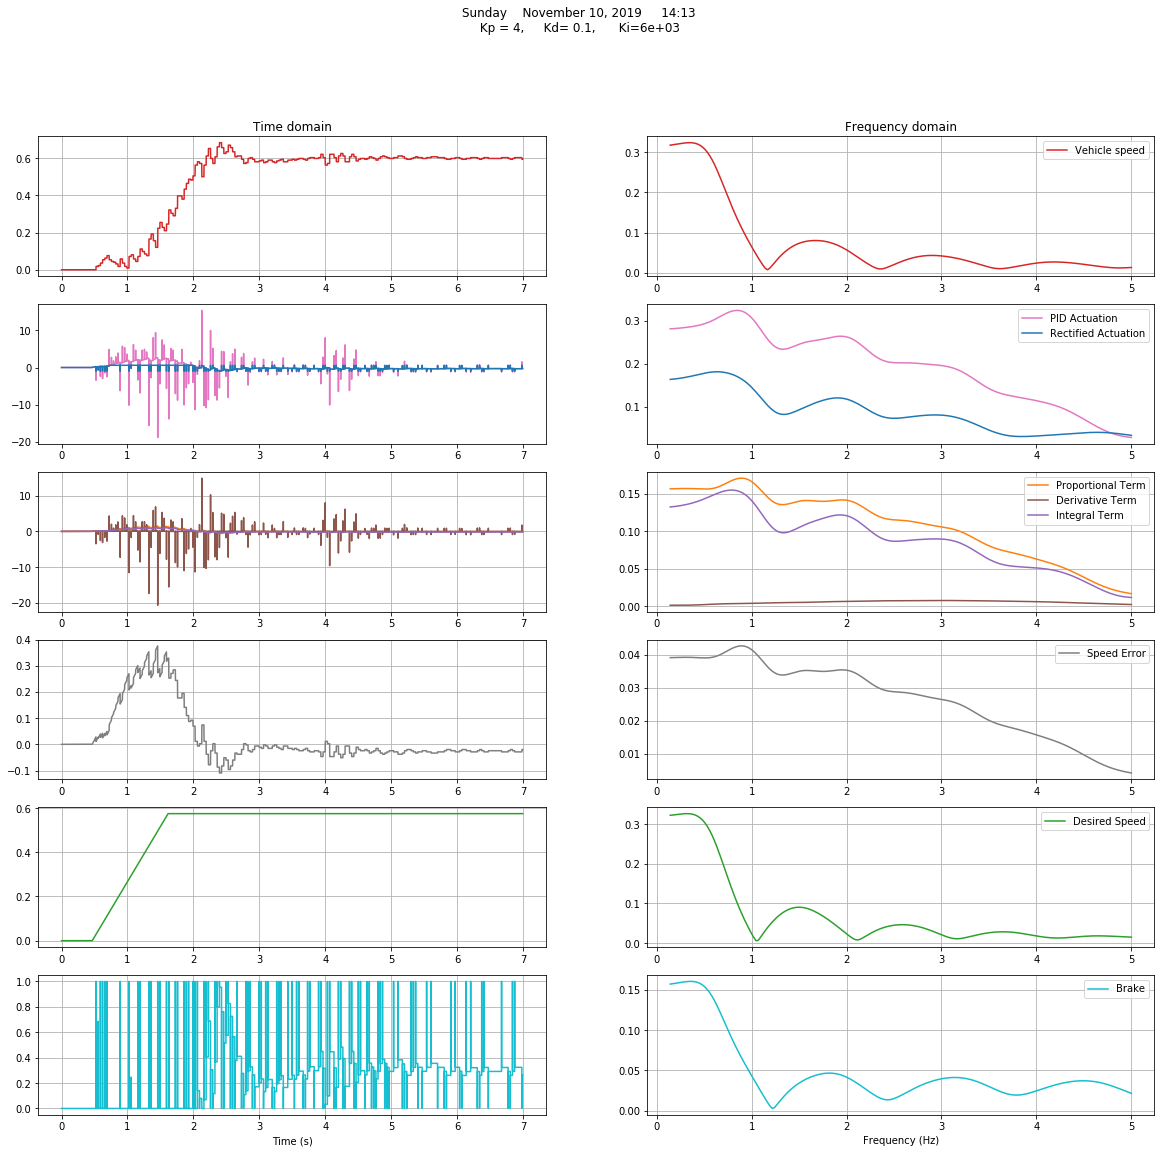

In [25]:
npz_index = 25
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping+[['brakepos']], time_range = (0., 10.))

# 21st Trial

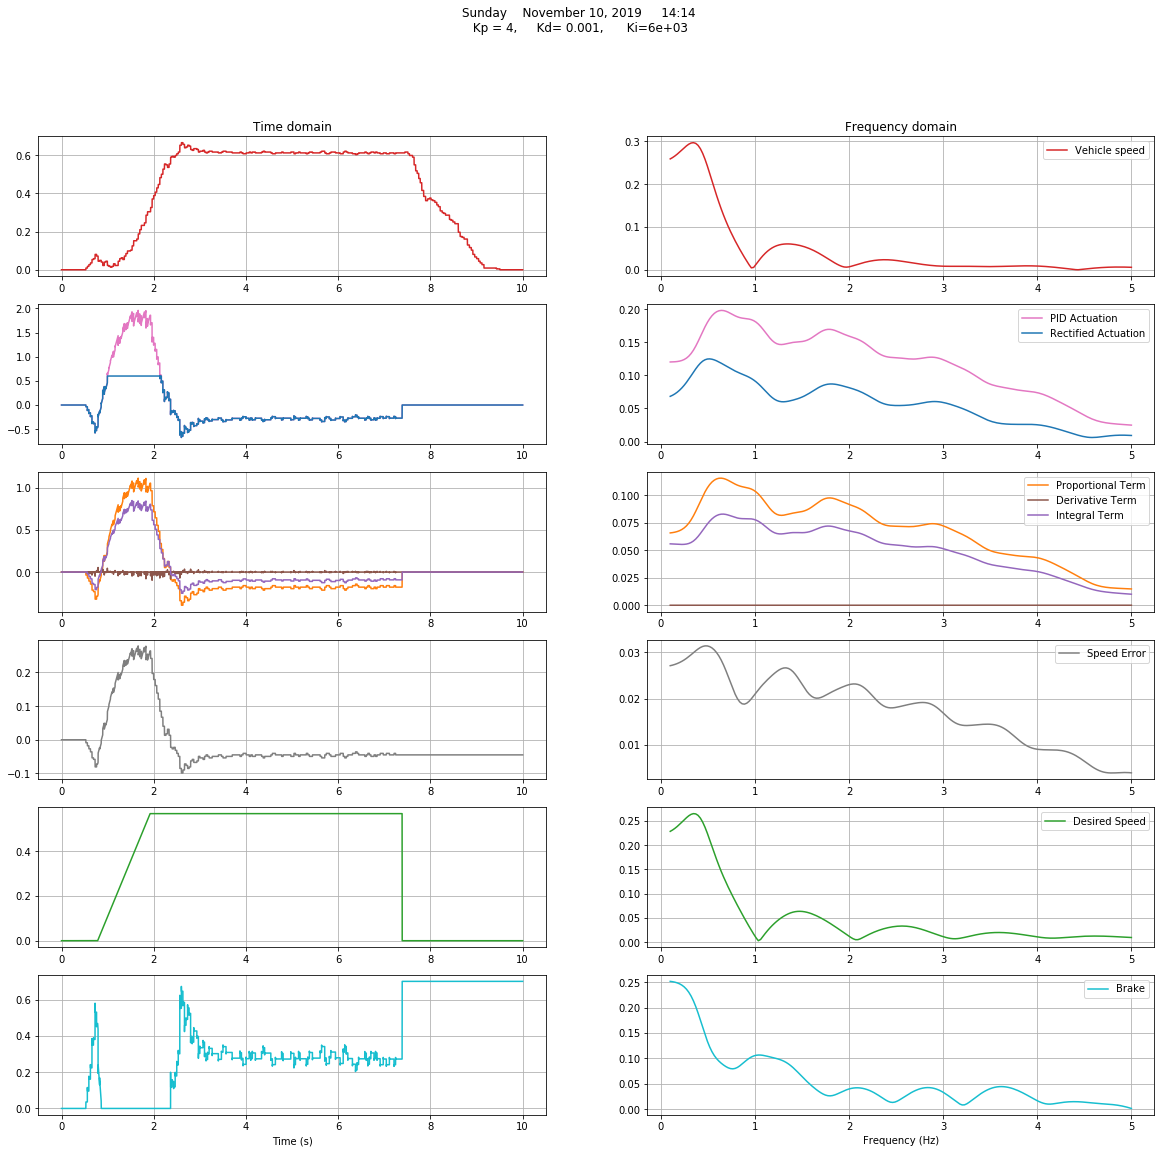

In [26]:
npz_index = 27
npz_path = npzfile_list[npz_index]
data = np.load(npz_path)
fig, axes = tf_plotter(data, sig_groupping=sig_groupping+[['brakepos']], time_range = (0., 10.))